In [ ]:
!unzip /content/dataset/ml-1m.zip

Archive:  /content/dataset/ml-1m.zip
   creating: ml-1m/
  inflating: ml-1m/movies.dat        
  inflating: ml-1m/ratings.dat       
  inflating: ml-1m/README            
  inflating: ml-1m/users.dat         


In [ ]:
#imports
import re
import pandas as pd
import plotly.express as px

In [ ]:
movies_df = data = pd.read_csv('/content/ml-1m/movies.dat', delimiter='::', header=None, names=['ID', 'Title', 'Genres'], encoding='latin1')
users_df = data = pd.read_csv('/content/ml-1m/users.dat', delimiter='::', header=None, names=['ID', 'Gender', 'Age', 'Occupation', 'Zip-Code'], encoding='latin1')
ratings_df = data = pd.read_csv('/content/ml-1m/ratings.dat', delimiter='::', header=None, names=['UserId', 'MovieId', 'Rating', 'Timestamp' ], encoding='latin1')

<ipython-input-16-5ba5c73d5254>:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

<ipython-input-16-5ba5c73d5254>:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

<ipython-input-16-5ba5c73d5254>:3: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [ ]:
print("movies shape", movies_df.shape)
print("users shape", users_df.shape)
print("ratings shape", ratings_df.shape)

movies shape (3883, 3)
users shape (6040, 5)
ratings shape (1000209, 4)


In [ ]:
movies_df['Genres'] = movies_df['Genres'].apply(lambda x: x.split('|'))
movies_df_exploded = movies_df.explode('Genres')
px.histogram(movies_df_exploded, x='Genres', height=400, title='Movie count by genre').update_xaxes(categoryorder="total descending")


In [ ]:
movies_df['year'] = movies_df['Title'].apply(lambda movie_name: re.search('\((\d*)\)', movie_name).groups(1)[0])
movie_count_by_year = px.histogram(movies_df, x='year', height=400, title='Movie count by year').update_xaxes(categoryorder="total descending")
movie_count_by_year

<Axes: title={'center': 'User count by age'}, xlabel='Age'>

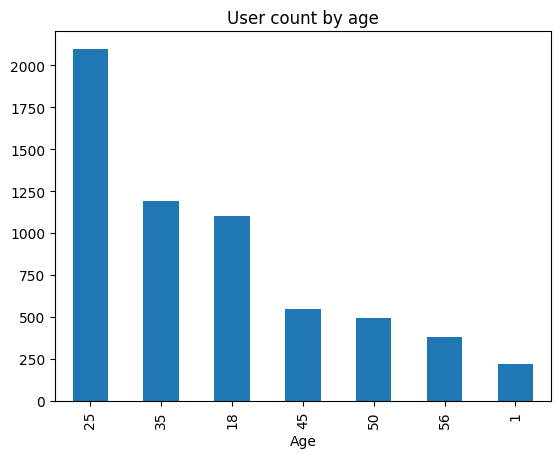

In [ ]:
user_count_by_age = users_df['Age'].value_counts()
user_count_by_age.plot(kind='bar', title='User count by age')



In [ ]:
occupation_names = ["other",
                    "academic/educator",
                    "artist",
                    "clerical/admin",
                    "college/grad student",
                    "customer service",
                    "doctor/health care",
                    "executive/managerial",
                    "farmer",
                    "homemaker",
                    "K-12 student",
                    "lawyer",
                    "programmer",
                    "retired",
                    "sales/marketing",
                    "scientist",
                    "self-employed",
                    "technician/engineer",
                    "tradesman/craftsman",
                    "unemployed",
                    "writer"
                    ]
occupation_dict = {occupation_names[i]: i for i in range(len(occupation_names))}


In [ ]:
users_df['Occupation'] = users_df['Occupation'].apply(lambda x: occupation_dict[x])
user_count_by_occupation = users_df['Occupation'].value_counts().sort_values(ascending=False)
fig = px.bar(user_count_by_occupation, title='User count by occupation')
fig.update_xaxes(ticktext=occupation_names, tickvals=list(range(len(occupation_names))))
fig.show()


In [ ]:
rating_counts = ratings_df['Rating'].value_counts()
labels = [f'Rating {rating}' for rating in rating_counts.index]

fig = px.pie(rating_counts, values=rating_counts.values, names=labels, title='Count of ratings')
fig.show()


In [ ]:
movie_ratings = ratings_df.groupby('MovieId')['Rating'].count()
max_rated_movie_id = movie_ratings.idxmax()
max_rated_movie_title = movies_df[movies_df['ID'] == max_rated_movie_id]['Title'].values[0]
print(f"Movie with maximum ratings: {max_rated_movie_title}")
print(f"Number of ratings: {movie_ratings[max_rated_movie_id]}")


Movie with maximum ratings: American Beauty (1999)
Number of ratings: 3428
